In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


# 2.1 Classical Regression in the Time Series Context

                            OLS Regression Results                            
Dep. Variable:                chicken   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1974.
Date:                Tue, 18 May 2021   Prob (F-statistic):           2.83e-98
Time:                        12:13:24   Log-Likelihood:                -532.83
No. Observations:                 180   AIC:                             1070.
Df Residuals:                     178   BIC:                             1076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.5682      3.176    -17.184      0.0

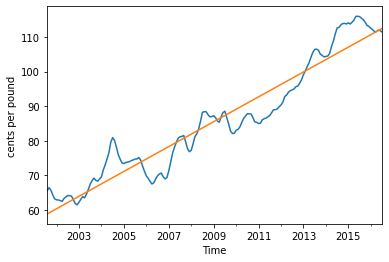

In [2]:
# Example 2.1
time = pd.Series([idx.ordinal for idx in chicken.index], index=chicken.index)
data_reg = pd.concat([time, chicken], axis=1)
data_reg.columns = ["time", "chicken"]

fit = ols(formula="chicken ~ time", data=data_reg).fit()
print(fit.summary())

ax = chicken.plot(xlabel="Time", ylabel="cents per pound", legend=False)
ax.plot(data_reg.index, fit.params.Intercept + fit.params.time * time)
plt.show()

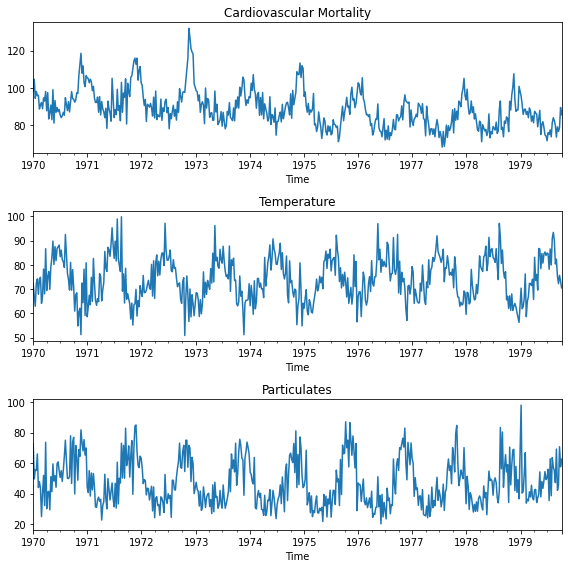

In [3]:
# Example 2.2
fig, axes = plt.subplots(nrows=3, figsize=(8, 8))

cmort.plot(ax=axes[0], xlabel="Time", title="Cardiovascular Mortality", legend=False)
tempr.plot(ax=axes[1], xlabel="Time", title="Temperature", legend=False)
part.plot(ax=axes[2], xlabel="Time", title="Particulates", legend=False)

fig.tight_layout()
plt.show()

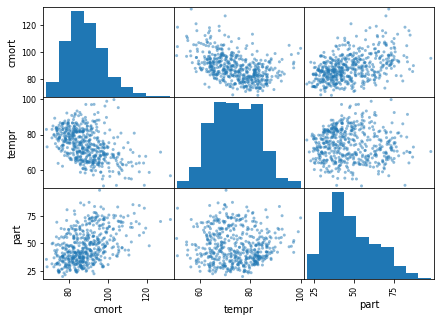

In [4]:
pairs = pd.concat([cmort, tempr, part], axis=1)
pairs.columns = ["cmort", "tempr", "part"]

pd.plotting.scatter_matrix(pairs, figsize=(7, 5))
plt.show()

In [5]:
# Regression
temp = tempr - tempr.mean() # center temperature
temp2 = temp.pow(2) # square it
trend = pd.Series([idx.ordinal for idx in cmort.index], index=cmort.index) # time

X = pd.concat([cmort, temp, temp2, trend, part], axis=1)
X.columns = ["cmort", "temp", "temp2", "trend", "part"]

fit = ols(formula="cmort ~ trend + temp + temp2 + part", data=X).fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  cmort   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     185.1
Date:                Tue, 18 May 2021   Prob (F-statistic):           2.20e-97
Time:                        12:13:25   Log-Likelihood:                -1660.1
No. Observations:                 508   AIC:                             3330.
Df Residuals:                     503   BIC:                             3351.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.5931      1.102     74.032      0.0

In [6]:
print(sm.stats.anova_lm(fit)) # ANOVA table

             df        sum_sq       mean_sq           F        PR(>F)
trend       1.0  10673.289494  10673.289494  261.791867  1.035893e-47
temp        1.0   8605.746543   8605.746543  211.079673  3.472363e-40
temp2       1.0   3427.085491   3427.085491   84.058725  1.227231e-18
part        1.0   7473.199730   7473.199730  183.300838  7.874638e-36
Residual  503.0  20507.377403     40.770134         NaN           NaN


In [7]:
num = cmort.shape[0] # sample size
print(fit.aic/num - np.log(2 * np.pi)) # AIC
print(fit.bic/num - np.log(2 * np.pi)) # BIC

AICc = np.log(np.sum(fit.resid ** 2)/num) + (num + 5)/(num - 5 - 2) # AICc
print(AICc)

4.717743565480401
4.7593821624053865
4.722010621918706


In [8]:
# Example 2.3
fish = pd.concat([rec, soi.shift(6)], axis=1).dropna()
fish.columns = ["rec", "soiL6"]
fit = ols(formula="rec ~ soiL6", data=fish).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    rec   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     253.5
Date:                Tue, 18 May 2021   Prob (F-statistic):           1.68e-45
Time:                        12:13:25   Log-Likelihood:                -2024.9
No. Observations:                 447   AIC:                             4054.
Df Residuals:                     445   BIC:                             4062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.7898      1.088     60.469      0.0

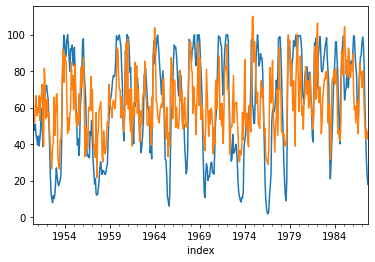

In [9]:
fish["rec"].plot(xlabel="Time")
fit.fittedvalues.plot()
plt.show()